# [E-15] OCR project

### OCR : GOOGLE cloud vision api 사용


In [3]:
def detect_text(path):
    """Detects text in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()
        
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    print('Texts:')

    for text in texts:
       print('\n"{}"'.format(text.description))

    vertices = (['({},{})'.format(vertex.x, vertex.y)
                 for vertex in text.bounding_poly.vertices])

    print('bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

In [4]:
# 로컬 환경에서는 다운받은 인증키 경로가 정확하게 지정되어 있어야 합니다. 
# 클라우드 환경에서는 무시해도 좋습니다
!ls -l $GOOGLE_APPLICATION_CREDENTIALS

import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] =  os.getenv('HOME')+'/aiffel/ocr_python/vivid-art-342301-2816c454ba81.json'

# 입력 이미지 경로를 지정해 주세요.
# (예시) path = os.getenv('HOME')+'/aiffel/ocr_python/test_image.png'
path = os.getenv('HOME')+'/aiffel/ocr_python/license.jpg'  

# 위에서 정의한 OCR API 이용 함수를 호출해 봅시다.
detect_text(path)

total 999144
-rw-r--r-- 1 root root   3213221 Feb 15 09:10  cifar_dcgan.gif
-rw-r--r-- 1 root root     75708 Jan 11 09:26 '[E-01]RSPgame.ipynb'
-rw-r--r-- 1 root root     43083 Jan 11 09:45 '[E02] breast_cancer.ipynb'
-rw-r--r-- 1 root root     40833 Jan 11 09:36 '[E02] digits.ipynb'
-rw-r--r-- 1 root root     30068 Jan 11 09:36 '[E02] wine.ipynb'
-rw-r--r-- 1 root root    721278 Jan 17 18:30 '[E-03] Face Detection.ipynb'
-rw-r--r-- 1 root root     42906 Jan 20 06:34 '[E-04] make a lyricist.ipynb'
-rw-r--r-- 1 root root     40884 Jan 19 14:27 '[E-04] make a lyricist-practice.ipynb'
-rw-r--r-- 1 root root    737575 Jan 19 14:27 '[E-05] House price prediction(kaggle tutorial).ipynb'
-rw-r--r-- 1 root root     78245 Jan 27 13:14 '[E-06] Sentiment Analysis.ipynb'
-rw-r--r-- 1 root root     76532 Jan 27 05:54 '[E-06] Sentiment Analysis-practice01.ipynb'
-rw-r--r-- 1 root root   4072738 Feb  2 14:45 '[E-07] Human segmentation.ipynb'
-rw-r--r-- 1 root root    143002 Feb  8 02:52 '[E-08] Text 

#### 작은 숫자들까지도 매우 잘 인식 된 것을 확인할 수 있다.

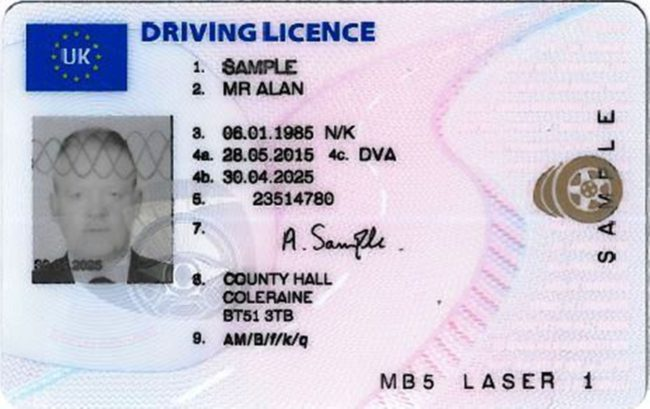

### OCR : Keras 사용
- 한글을 불가.
- recognize()를 통해서 문자 인식 예측 결과를 얻을 수 있다.

In [5]:
import matplotlib.pyplot as plt
import keras_ocr

# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


In [5]:
# 테스트에 사용할 이미지 url을 모아 봅니다. 추가로 더 모아볼 수도 있습니다. 
image_urls = [
  'https://source.unsplash.com/M7mu6jXlcns/640x460',
  'https://source.unsplash.com/6jsp4iHc8hI/640x460',
  'https://source.unsplash.com/98uYQ-KupiE',
  'https://source.unsplash.com/j9JoYpaJH3A',
  'https://source.unsplash.com/eBkEJ9cH5b4'
]

images = [ keras_ocr.tools.read(url) for url in image_urls]
prediction_groups = [pipeline.recognize([url]) for url in image_urls]

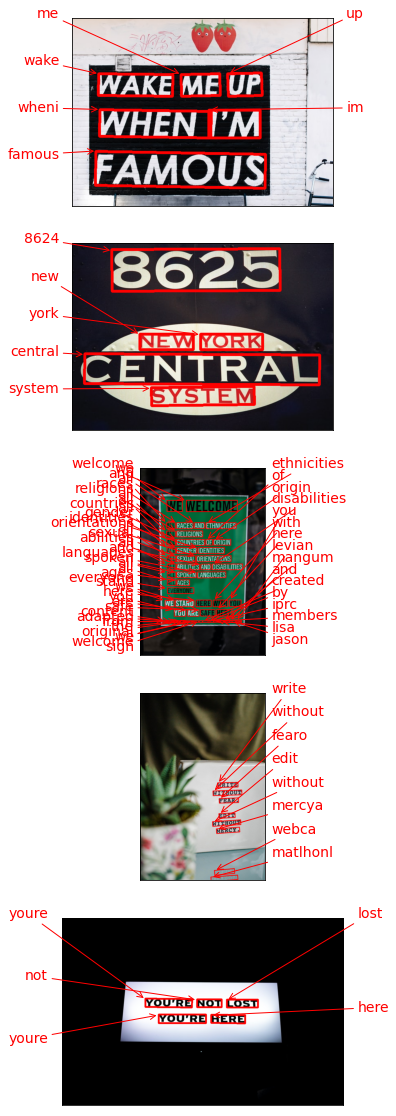

In [6]:
# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

### 테서랙트(Tesseract) 라이브러리 이용

- 테서랙트 설치하기, 테서랙트 파이썬 wrapper 설치하기.

$ sudo apt install tesseract-ocr

$ sudo apt install libtesseract-dev

$ pip list | grep pytesseract

- 한국어 사용은 아래 다운 후 'kor'로 바꿔 사용.

$ sudo apt install tesseract-ocr-kor

- pytesseract.image_to_data() 사용하여 결과 뽑아낼 수 있다.


In [7]:
import os
import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt

# OCR Engine modes(–oem):
# 0 - Legacy engine only.
# 1 - Neural nets LSTM engine only.
# 2 - Legacy + LSTM engines.
# 3 - Default, based on what is available.

# Page segmentation modes(–psm):
# 0 - Orientation and script detection (OSD) only.
# 1 - Automatic page segmentation with OSD.
# 2 - Automatic page segmentation, but no OSD, or OCR.
# 3 - Fully automatic page segmentation, but no OSD. (Default)
# 4 - Assume a single column of text of variable sizes.
# 5 - Assume a single uniform block of vertically aligned text.
# 6 - Assume a single uniform block of text.
# 7 - Treat the image as a single text line.
# 8 - Treat the image as a single word.
# 9 - Treat the image as a single word in a circle.
# 10 - Treat the image as a single character.
# 11 - Sparse text. Find as much text as possible in no particular order.
# 12 - Sparse text with OSD.
# 13 - Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.


# 테서랙트로 문자 검출하고 이미지 자르기 (detection)
def crop_word_regions(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list


work_dir = os.getenv('HOME')+'/aiffel/ocr_python'
img_file_path = work_dir + '/GOOGLE OCR TEST.png'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

/aiffel/aiffel/ocr_python/0000.png
/aiffel/aiffel/ocr_python/0001.png
/aiffel/aiffel/ocr_python/0002.png
/aiffel/aiffel/ocr_python/0003.png


In [8]:
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(cropped_image_path_list)

Google

OCR

CEST

FDHRIRYEOKDVBMDMXCB

Done


TEST를 CEST로 잘 못 인식했다... 
밑에 랜덤한 알파벳 문자열도 J를 I 로 인식하는 오류가 하나 존재한다. FDHR **"I"** RYEOKDVBMDMXCB

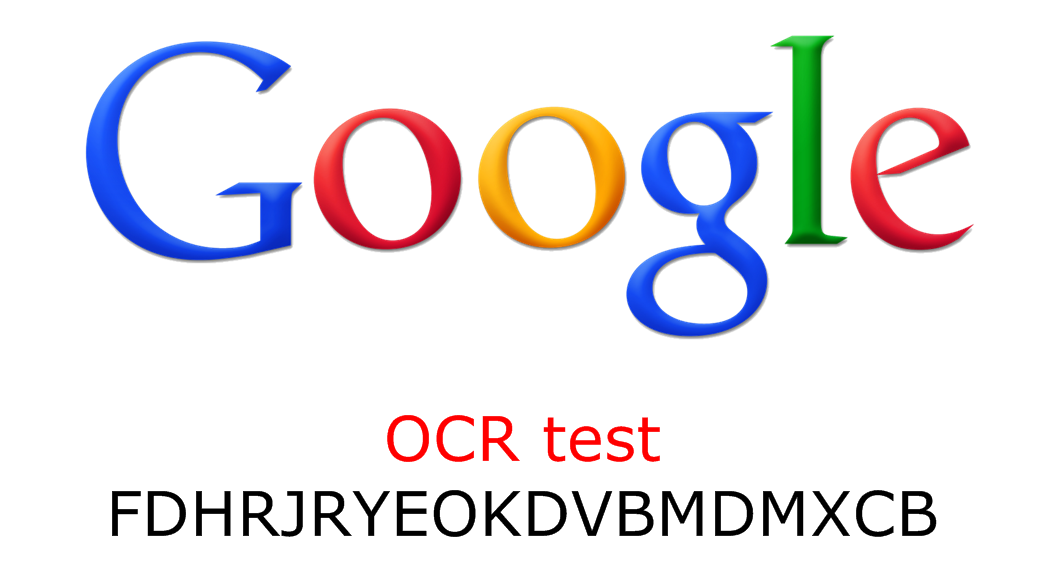

# 다양한 OCR모델 비교하기


|평가문항|상세기준|
|:---|:---|
|1. OCR을 활용하여 구현하려는 서비스의 기획이 타당한가?|목표로 하는 서비스가 OCR를 적용 가능하며, OCR을 활용했을 때 더욱 유용해진다.|
|2. 모델 평가기준이 명확하고 체계적으로 세워졌는가?|평가 기준에 부합하는 테스트 데이터의 특징이 무엇인지 명확하게 제시되었다.|
|3. 평가기준에 따라 충분한 분량의 테스트가 진행되고 그 결과가 잘 정리되었는가?|최대 20장까지의 테스트 이미지를 사용해 제시된 평가 기준에 따른 테스트 결과가 잘 정리되어 결론이 도출되었다.|

### Step1. 검증용 데이터셋 준비


In [1]:
import keras_ocr
import pytesseract

print(keras_ocr.__version__)
print(pytesseract.__version__)
# pytesseract는 tesseract-ocr에 종속적입니다. 아래 명령어를 통해 설치해야 할 수도 있습니다.
# !sudo apt install tesseract-ocr

0.8.8
0.3.8


In [8]:
# load images
image_path = os.getenv('HOME')+ '/aiffel/ocr_python/test'
file_list = sorted(os.listdir(image_path))  #파일명 jpg, JPG로 구분 정렬
file_list

['example_01.png',
 'example_02.png',
 'example_03(invo).png',
 'example_04(book).jpeg',
 'example_05(paper).jpeg']

### Step2. keras-ocr, Tesseract로 테스트 진행(Google OCR API는 선택 사항)

위 두 가지 모듈을 활용하는 방법에 대해서는 코드 레벨로 이미 경험해 보셨을 것입니다. 이미지 리스트를 정리한 후 반복문을 실행하며 모듈이 출력한 결과를 모아 봅시다. 가능하다면 Google OCR API를 포함해 세 가지 모듈을 다 써보세요.


### keras-ocr 사용.

In [9]:
import matplotlib.pyplot as plt
import keras_ocr

# keras-ocr이 detector(작동기)과 recognizer(인식기)를 위한 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


In [10]:
# 테스트에 사용할 이미지 모으기, 직접 데이터 이미지들을 받아서 사용하기 때문에 os.path.join(image_path, file) 으로 변경 필요함. 

images = [keras_ocr.tools.read(os.path.join(image_path, file)) for file in file_list]
prediction_groups = [pipeline.recognize([os.path.join(image_path, file)]) for file in file_list]

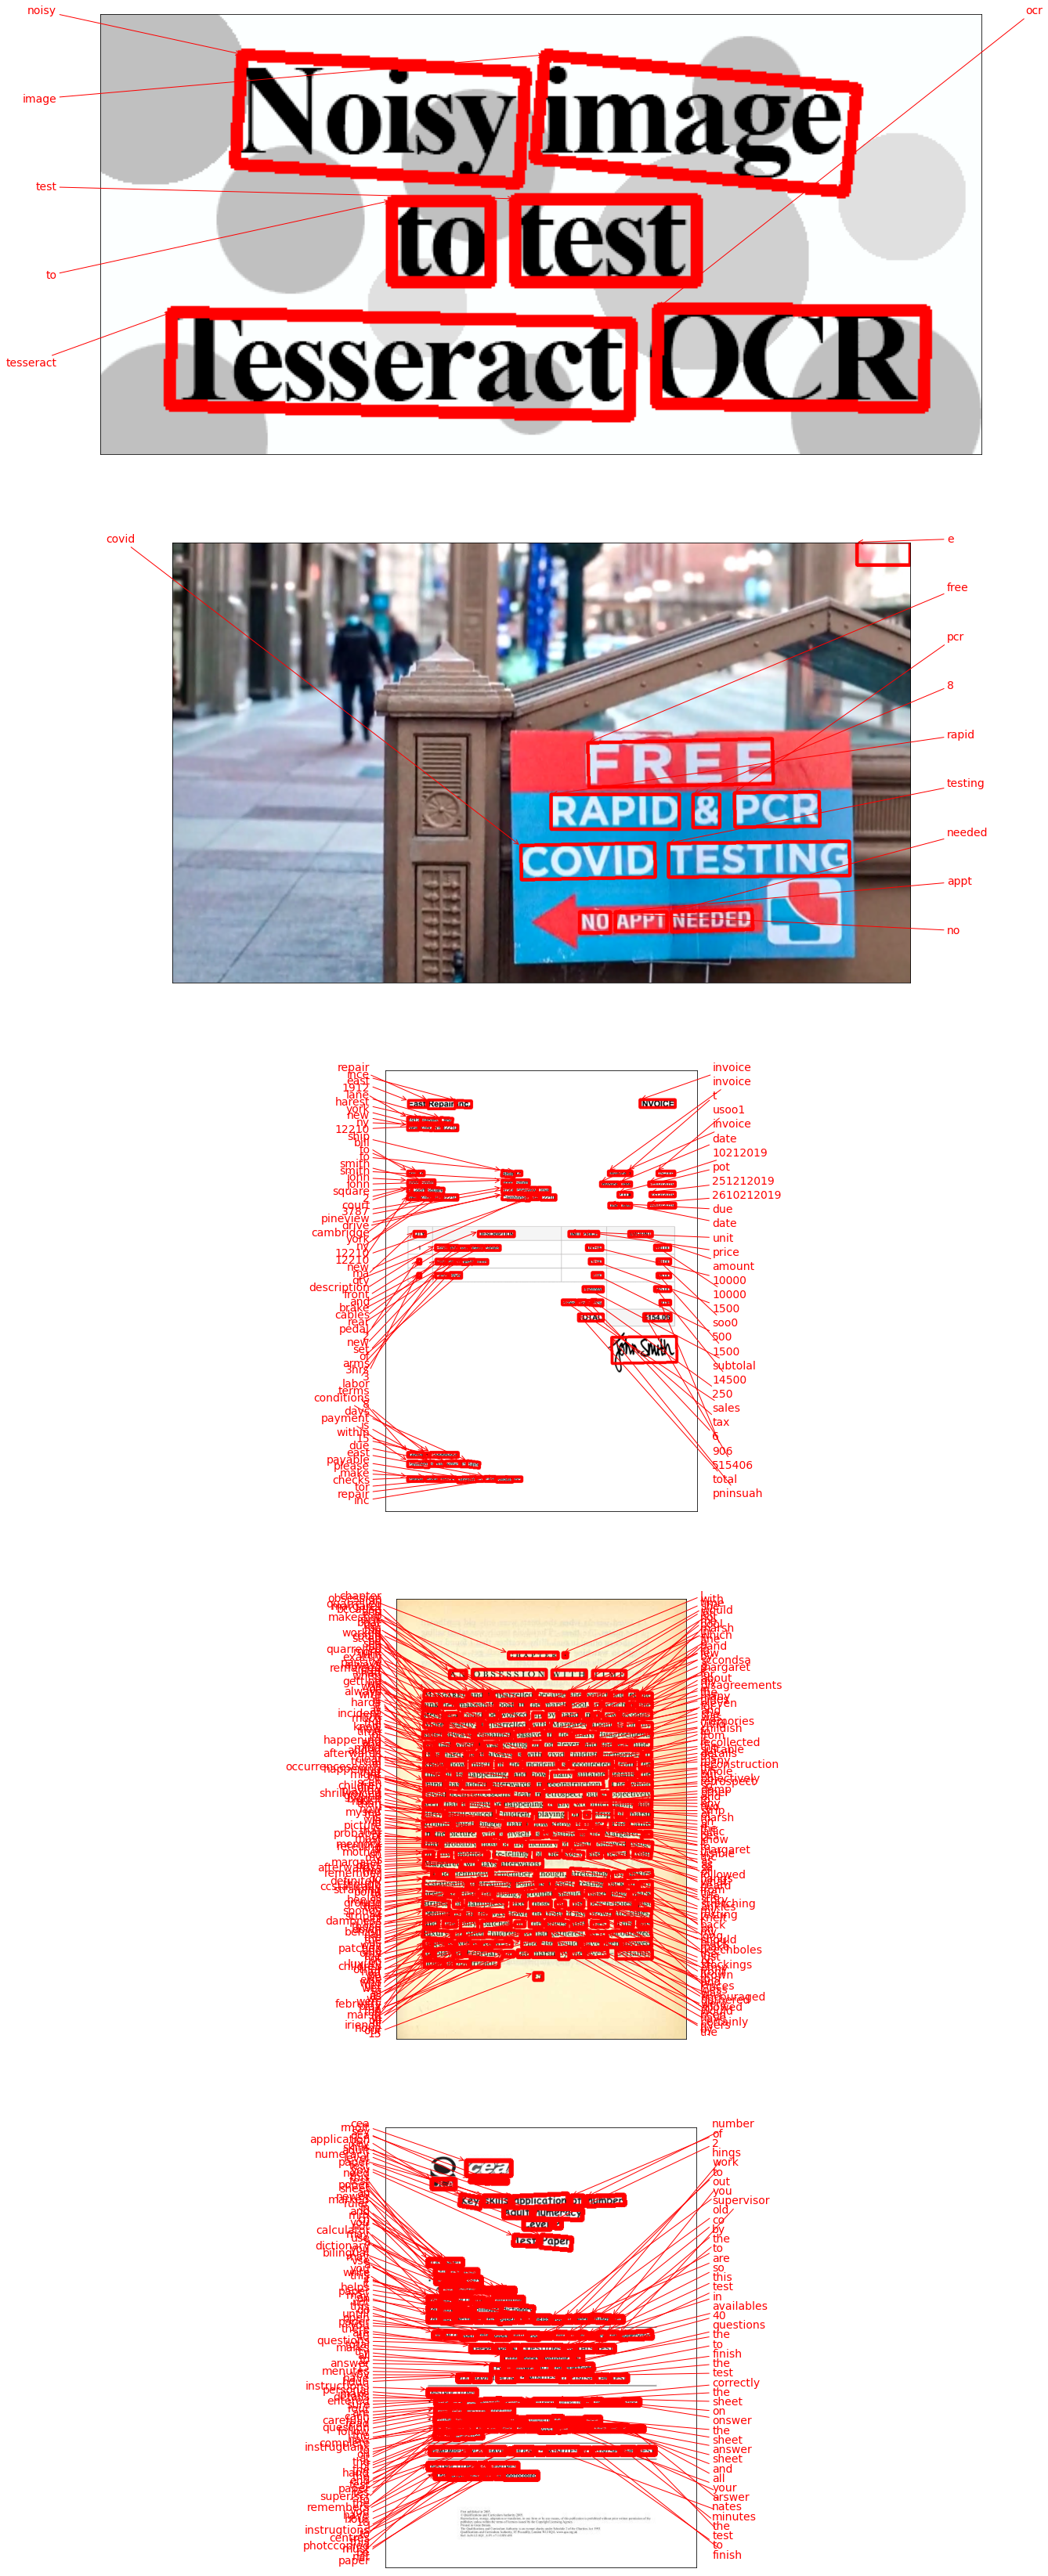

In [11]:
# 인식된 결과 시각화

# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(60, 60))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

### Tesseract test 사용.

In [13]:
import os
import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt

# 1.  OCR 엔진 모드(–oem):
# 0 - 레거시 엔진 전용.
# 1 - 신경망 LSTM 엔진 전용.
# 2 - 레거시 + LSTM 엔진.
# 3 - 사용 가능한 항목을 기반으로 한 기본값입니다.

# 2. 페이지 분할 모드(–psm):
# 0 - 방향 및 스크립트 감지(OSD) 전용.
# 1 - OSD를 사용한 자동 페이지 분할.
# 2 - 자동 페이지 분할이지만 OSD 또는 OCR은 없습니다.
# 3 - 완전 자동 페이지 분할이지만 OSD는 없습니다. (기본)
# 4 - 가변 크기의 단일 텍스트 열을 가정합니다.
# 5 - 세로로 정렬된 텍스트의 균일한 단일 블록을 가정합니다.
# 6 - 하나의 균일한 텍스트 블록을 가정합니다.
# 7 - 이미지를 단일 텍스트 줄로 취급합니다.
# 8 - 이미지를 한 단어로 취급합니다.
# 9 - 이미지를 원 안의 한 단어로 취급합니다.
# 10 - 이미지를 단일 문자로 취급합니다.
# 11 - 희소 텍스트. 특정 순서 없이 가능한 한 많은 텍스트를 찾습니다.
# 12 - OSD가 있는 희소 텍스트.
# 13 - 원시 라인. Tesseract 관련 해킹을 우회하여 이미지를 단일 텍스트 줄로 취급합니다.

def crop_word_regions(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list

work_dir = os.getenv('HOME')+'/aiffel/ocr_python/test'
img_file_path = work_dir + '/example_03(invo).png'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

/aiffel/aiffel/ocr_python/test/0000.png
/aiffel/aiffel/ocr_python/test/0001.png
/aiffel/aiffel/ocr_python/test/0002.png
/aiffel/aiffel/ocr_python/test/0003.png
/aiffel/aiffel/ocr_python/test/0004.png
/aiffel/aiffel/ocr_python/test/0005.png
/aiffel/aiffel/ocr_python/test/0006.png
/aiffel/aiffel/ocr_python/test/0007.png
/aiffel/aiffel/ocr_python/test/0008.png
/aiffel/aiffel/ocr_python/test/0009.png
/aiffel/aiffel/ocr_python/test/0010.png
/aiffel/aiffel/ocr_python/test/0011.png
/aiffel/aiffel/ocr_python/test/0012.png
/aiffel/aiffel/ocr_python/test/0013.png
/aiffel/aiffel/ocr_python/test/0014.png
/aiffel/aiffel/ocr_python/test/0015.png
/aiffel/aiffel/ocr_python/test/0016.png
/aiffel/aiffel/ocr_python/test/0017.png
/aiffel/aiffel/ocr_python/test/0018.png
/aiffel/aiffel/ocr_python/test/0019.png
/aiffel/aiffel/ocr_python/test/0020.png
/aiffel/aiffel/ocr_python/test/0021.png
/aiffel/aiffel/ocr_python/test/0022.png
/aiffel/aiffel/ocr_python/test/0023.png
/aiffel/aiffel/ocr_python/test/0024.png


In [14]:
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(cropped_image_path_list)

air

-ast

Rep

inc.

1912

Harvest

| ane

New

York,

NY

172710

Bill

10

Ship

TO

JOonn

Smith

Jonn

Smith

2

Court

Square

3/Be

rPineview

rive

New

York,

NY

1722710

Cambridge,

VA A.

122710

ary

UESCRIPTION

7

|

Front

anc

isis

nrake

cables

2

|

NeW

Set

Of

pedal

at ttiS

3


| apor

3nrs

Terms

&

Conaitions

Payment

:-.

oue

within

1s

days

riease

make

CnNecks

payable

to

cast

Nepair

INC.


UNIT

PRICE

100.00

15.00

* OU

Subtotal

Sales

Tax

6h 25%,

TOTAL

INVOICE

LIS-007

11/02/2019

2312/2019

Due

Date

2H/02/2019

AMOUNT

100.00

30) OO

15.00

145.00

9 O06

$154.06

awh

Done


### GOOGLE API 사용.

In [15]:
def detect_text(path):
    """Detects text in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()
        
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    print('Texts:')

    for text in texts:
       print('\n"{}"'.format(text.description))

    vertices = (['({},{})'.format(vertex.x, vertex.y)
                 for vertex in text.bounding_poly.vertices])

    print('bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

In [19]:
# 로컬 환경에서는 다운받은 인증키 경로가 정확하게 지정되어 있어야 합니다. 
# 클라우드 환경에서는 무시해도 좋습니다
!ls -l $GOOGLE_APPLICATION_CREDENTIALS

import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] =  os.getenv('HOME')+'/aiffel/ocr_python/vivid-art-342301-2816c454ba81.json'

# 입력 이미지 경로를 지정해 주세요.
# (예시) path = os.getenv('HOME')+'/aiffel/ocr_python/test_image.png'
path = os.getenv('HOME')+'/aiffel/ocr_python/test/example_03(invo).png'  

# 위에서 정의한 OCR API 이용 함수를 호출해 봅시다.
detect_text(path)

ls: cannot access '/aiffel/aiffel/ocr_python/my_google_api_key.json': No such file or directory
Texts:

"East Repair Inc.
INVOICE
1912 Harvest Lane
New York, NY 12210
Bill To
Ship To
Invoice #
US-001
John Smith
John Smith
Invoice Date
11/02/2019
2 Court Square
New York, NY 12210
3787 Pineview Drive
P.O.#
2312/2019
Cambridge, MA 12210
Due Date
26/02/2019
QTY
DESCRIPTION
UNIT PRICE
AMOUNT
1
Front and rear brake cables
100.00
100.00
2
New set of pedal arms
15.00
30.00
3
Labor 3hrs
5.00
15.00
Subtotal
145.00
Sales Tax 6.25%
9.06
ТОTAL
$154.06
Swith
Terms & Conditions
Payment is due within 15 days
Please make checks payable to: East Repair Inc.
"

"East"

"Repair"

"Inc."

"INVOICE"

"1912"

"Harvest"

"Lane"

"New"

"York,"

"NY"

"12210"

"Bill"

"To"

"Ship"

"To"

"Invoice"

"#"

"US-001"

"John"

"Smith"

"John"

"Smith"

"Invoice"

"Date"

"11/02/2019"

"2"

"Court"

"Square"

"New"

"York,"

"NY"

"12210"

"3787"

"Pineview"

"Drive"

"P.O.#"

"2312/2019"

"Cambridge,"

"MA"

"12210"

### Step3. 결과 분석과 결론 제시

- 인보이스 이미지로 결과를 비교해보았다.
- 구글OCR API가 다른 두 OCR test의 성능보다 압도적인 면을 보여줌.
- 한글 인식 또한 구글 OCR API가 성능이 좋은 것으로 알고 있다.

## 회고

- OCR은 이미 성능이 완벽할 거라 생각했는데 생각보다 좋지 않아서 당황했다. 훈련을 통해 더 나은 OCR TEST을 낼 수 있는 방법을 고민해봐야겠다.
- keras나 tesseract의 더욱 개선된 버전이 있는지 찾아봐야겠다.
